# Análise dos dados do Airbnb em Athenas

O Airbnb é uma plataforma global de hospedagem que conecta anfitriões, que têm um espaço disponível, com viajantes que buscam um lugar para ficar. Fundada em 2008, a empresa revolucionou o setor de hospitalidade ao permitir que pessoas alugassem quartos, apartamentos, casas e até espaços únicos como castelos e iglus. O Airbnb opera em mais de 190 países, oferecendo uma alternativa diversificada e frequentemente mais econômica aos hotéis tradicionais.

##Como os Dados são Gerados
Os dados do Airbnb são gerados através das interações entre anfitriões e hóspedes na plataforma. Cada vez que um anfitrião lista uma nova propriedade, ou que um hóspede faz uma reserva e deixa uma avaliação, essas interações são registradas e armazenadas. A empresa disponibiliza parte desses dados para fins de análise, o que permite entender melhor os padrões de uso, a distribuição de preços, a popularidade das localidades, entre outros aspectos importantes.

##Dicionário de Variáveis
Para nossa análise de dados de hospedagens do Airbnb em Atenas, temos um conjunto de variáveis que descrevem diferentes aspectos das listagens. Abaixo está um dicionário das variáveis presentes no nosso conjunto de dados:

* id: Identificação única da listagem.
* name: Nome da listagem.
* host_id: Identificação única do anfitrião.
* host_name: Nome do anfitrião.
* neighbourhood_group: Agrupamento de bairros (não utilizado, pois todos os valores são nulos).
* neighbourhood: Bairro onde a propriedade está localizada.
* latitude: Coordenada geográfica de latitude da propriedade.
* longitude: Coordenada geográfica de longitude da propriedade.
* room_type: Tipo de quarto oferecido (por exemplo, quarto inteiro, quarto compartilhado, etc.).
* price: Preço da hospedagem por noite.
* minimum_nights: Número mínimo de noites para reservar a propriedade.
* number_of_reviews: Número total de avaliações recebidas pela listagem.
* last_review: Data da última avaliação recebida.
* reviews_per_month: Número médio de avaliações por mês.
* calculated_host_listings_count: Número de listagens que o anfitrião possui.
* availability_365: Número de dias em que a listagem está disponível para reservas nos próximos 365 dias.
* number_of_reviews_ltm: Número de avaliações nos últimos 12 meses.
* license: Licença da propriedade (caso aplicável).

##Objetivo da Análise
Através desta análise, buscamos explorar diferentes aspectos das hospedagens do Airbnb em Atenas, como a distribuição de preços, padrões de avaliação, disponibilidade, e a geolocalização das propriedades. Também aplicaremos técnicas de clustering para identificar agrupamentos de propriedades com características semelhantes, e analisaremos tendências temporais para entender como os padrões de uso mudam ao longo do tempo. Esta análise permitirá extrair insights valiosos para anfitriões, hóspedes, e para a própria plataforma do Airbnb.

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1º Parte - Exploração inicial dos dados.

In [46]:
# Bibliotecas gerais.
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np

In [47]:
# Instânciando o dataframe e observando seus valores inicial.
data = pd.read_csv('/content/drive/MyDrive/Code/Myrep/Airbnb_Athenas/Dataframe/listings.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,Condo in Athens · ★4.84 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,3798863.0,2376527.0,Entire home/apt,93.0,1,45,2023-10-23,0.29,7,351,11,957568
1,10990,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,3798903.0,2376448.0,Entire home/apt,41.0,1,71,2023-12-22,0.52,7,343,8,1070920
2,10993,Rental unit in Athens · ★4.83 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,3798888.0,2376473.0,Entire home/apt,42.0,1,93,2023-11-13,0.68,7,353,6,957080
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,3798903.0,2376448.0,Entire home/apt,48.0,1,30,2023-06-02,0.18,7,358,1,957422
4,27262,Rental unit in Athens · ★4.83 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,3798924.0,23765.0,Entire home/apt,48.0,1,23,2023-12-02,0.17,7,360,4,957579


In [48]:
data['name'].head()

0    Condo in Athens · ★4.84 · 3 bedrooms · 5 beds ...
1    Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...
2    Rental unit in Athens · ★4.83 · Studio · 2 bed...
3    Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...
4    Rental unit in Athens · ★4.83 · 1 bedroom · 1 ...
Name: name, dtype: object

In [49]:
# Extrair o rating da coluna 'name'
data['rating'] = data['name'].str.extract(r'★([\d.]+)')

# Extrair a quantidade de quartos da coluna 'name'
data['quantidade_quarto'] = data['name'].str.extract(r'(\d+)\sbedroom')

# Converter os valores extraídos para numéricos
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['quantidade_quarto'] = pd.to_numeric(data['quantidade_quarto'], errors='coerce')

# Verificar os valores das novas colunas
print(data[['rating', 'quantidade_quarto']].head())


   rating  quantidade_quarto
0    4.84                3.0
1    4.81                1.0
2    4.83                NaN
3    4.80                1.0
4    4.83                1.0


In [50]:
# Verificando as variáveis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13182 entries, 0 to 13181
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13182 non-null  int64  
 1   name                            13182 non-null  object 
 2   host_id                         13182 non-null  int64  
 3   host_name                       13182 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   13182 non-null  object 
 6   latitude                        13182 non-null  float64
 7   longitude                       13182 non-null  float64
 8   room_type                       13182 non-null  object 
 9   price                           12816 non-null  float64
 10  minimum_nights                  13182 non-null  int64  
 11  number_of_reviews               13182 non-null  int64  
 12  last_review                     

In [51]:
# Eliminando colunas inúteis
data.drop(columns=['neighbourhood_group'], inplace=True) # não tem valores
data.drop(columns=['id'], inplace=True) # não tem relevância

# Remover linhas onde 'last_review' é nulo
data = data[data['last_review'].notnull()]

# Preencher os valores NaN com 0 nas novas colunas
data['rating'] = data['rating'].fillna(0)
data['quantidade_quarto'] = data['quantidade_quarto'].fillna(0)

# Converter 'last_review' para datetime
data['last_review'] = pd.to_datetime(data['last_review'])

# Converter 'reviews_per_month' para float
data['reviews_per_month'] = pd.to_numeric(data['reviews_per_month'], errors='coerce')

<ipython-input-51-c51f1b3f30f7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['rating'].fillna(0)
<ipython-input-51-c51f1b3f30f7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quantidade_quarto'] = data['quantidade_quarto'].fillna(0)
<ipython-input-51-c51f1b3f30f7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [52]:
# Verificar quantos valores faltantes existem na coluna 'price'
missing_prices = data['price'].isnull().sum()
print(f'Valores faltantes em price: {missing_prices}')

# Aqui optei por remover as linhas com valores faltantes em 'price'
data = data[data['price'].notnull()]


Valores faltantes em price: 275


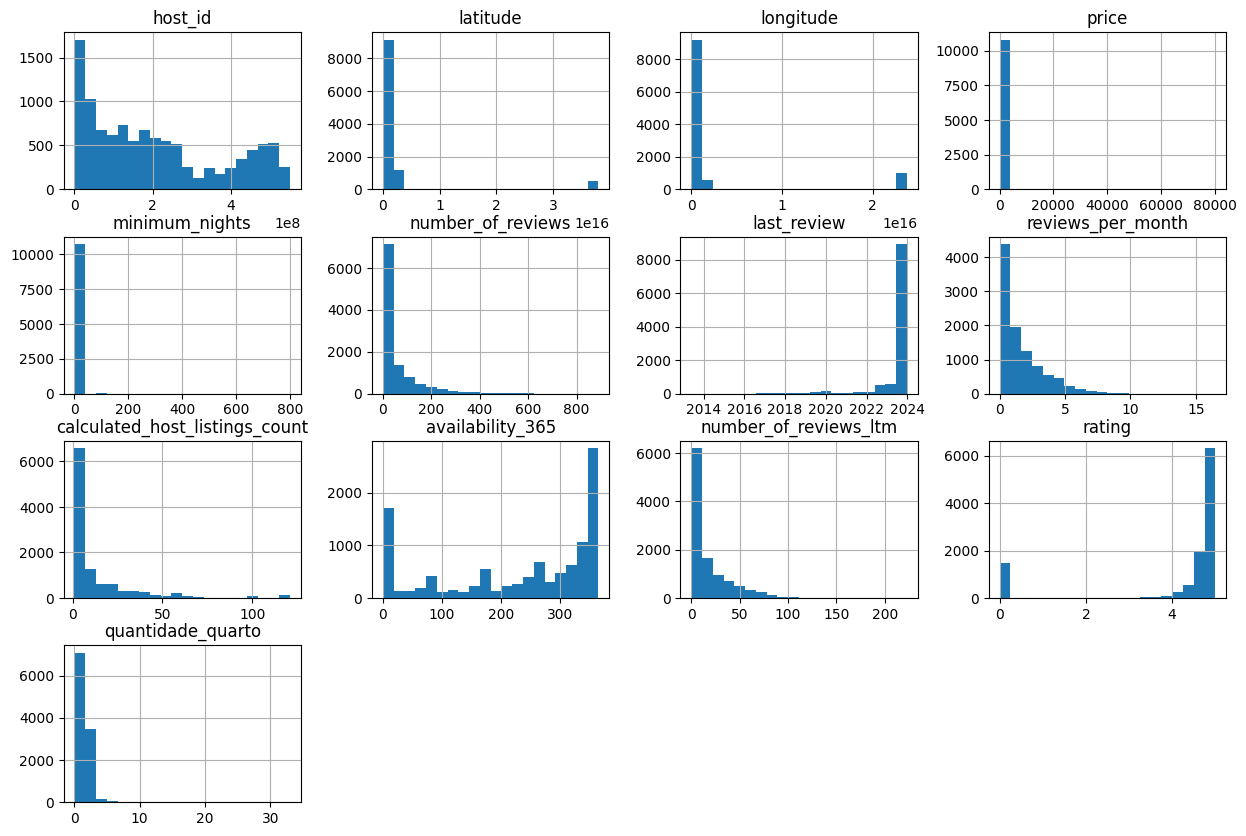

In [53]:
# Análise preliminar das variáveis numéricas.
data.hist(bins=20,figsize=(15,10));


É possível verificar que há uma dificuldade em visualizar as distribuições, o que sugere a presença de:

1.   Dados incompletos / faltantes.
2.   Presença de outliers.

Após verificar e eliminar os dados ausentes, resta-nos lidar com os outliers. Existem diversas formas de mitigar esse impacto, e vou adotar a abordagem estatística padrão de limitação por meio do boxplot e da técnica de escala do IQR (Interquartile Range).

In [54]:
data['price'].min()

10.0

In [55]:
data['price'].max()

80275.0

In [56]:
# Calcular o IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
lower_bound = Q1 - 1.5 * IQR # Valores extrenamente baixo não são atrativos, portanto maior sensibilidade do fator.
upper_bound = Q3 + 20 * IQR # O fator 20 diminuí a sensibilidade permitindo que valores maiores sejam considerados.

# Filtrar outliers
data_filtered = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# Comparar quantidade de linhas antes e depois da remoção de outliers
print(f"Linhas antes de remover outliers: {len(data)}")
print(f"Linhas depois de remover outliers: {len(data_filtered)}")

data = data_filtered


Linhas antes de remover outliers: 10793
Linhas depois de remover outliers: 10762


In [57]:
# Criando classe de preços para análise estatísticas
# Definir os limites das classes de preço
bins = [0, 50, 100, 150, 200, 300, 400, 500, np.inf]
labels = ['0-50', '51-100', '101-150', '151-200', '201-300', '301 - 400', '401 - 500', '500+']

# Criar uma nova coluna com as classes de preço
data['price_category'] = pd.cut(data['price'], bins=bins, labels=labels, right=False)

# Verificar a distribuição das classes
print(data['price_category'].value_counts())


price_category
51-100       4894
0-50         3307
101-150      1391
151-200       571
201-300       356
301 - 400     127
500+           72
401 - 500      44
Name: count, dtype: int64


<ipython-input-57-6c0950ab69ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_category'] = pd.cut(data['price'], bins=bins, labels=labels, right=False)


In [58]:
# Optei por usar a mesma técnica para  a viável  de noites minímas.
# Calcular o IQR
Q1 = data['minimum_nights'].quantile(0.25)
Q3 = data['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
data_filtered = data[(data['minimum_nights'] >= lower_bound) & (data['minimum_nights'] <= upper_bound)]

# Comparar quantidade de linhas antes e depois da remoção de outliers
print(f"Linhas antes de remover outliers: {len(data)}")
print(f"Linhas depois de remover outliers: {len(data_filtered)}")

data = data_filtered

Linhas antes de remover outliers: 10762
Linhas depois de remover outliers: 9949


In [65]:
data['quantidade_quarto'].value_counts()

quantidade_quarto
1.0     5880
2.0     2635
0.0      660
3.0      545
4.0      134
5.0       43
6.0       29
8.0       13
7.0        3
10.0       3
11.0       1
33.0       1
14.0       1
12.0       1
Name: count, dtype: int64

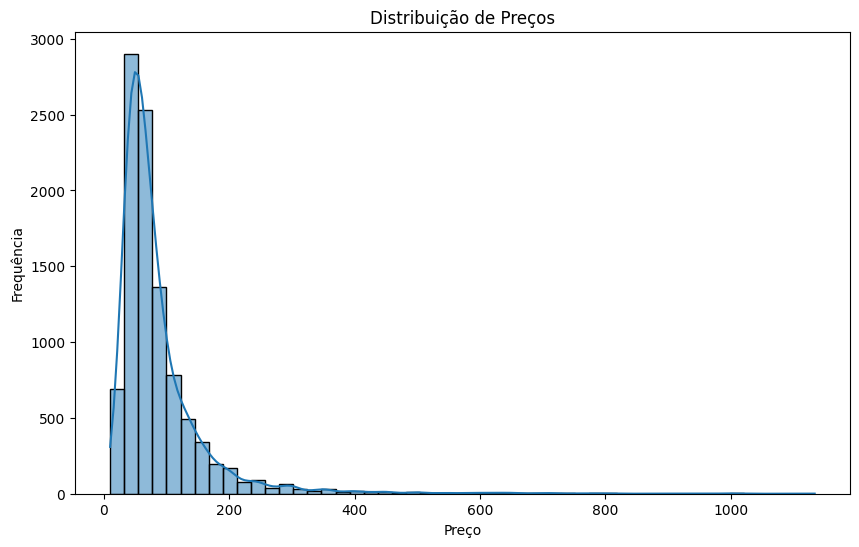

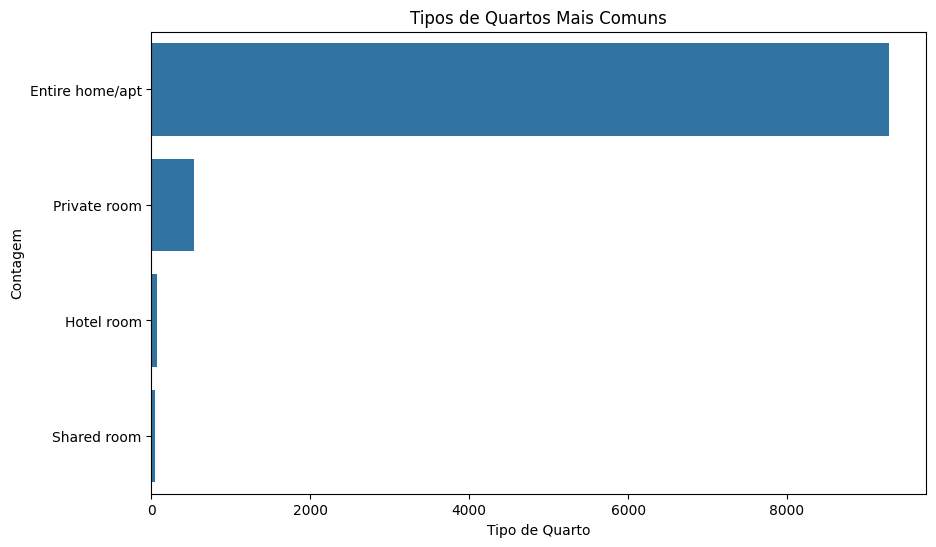

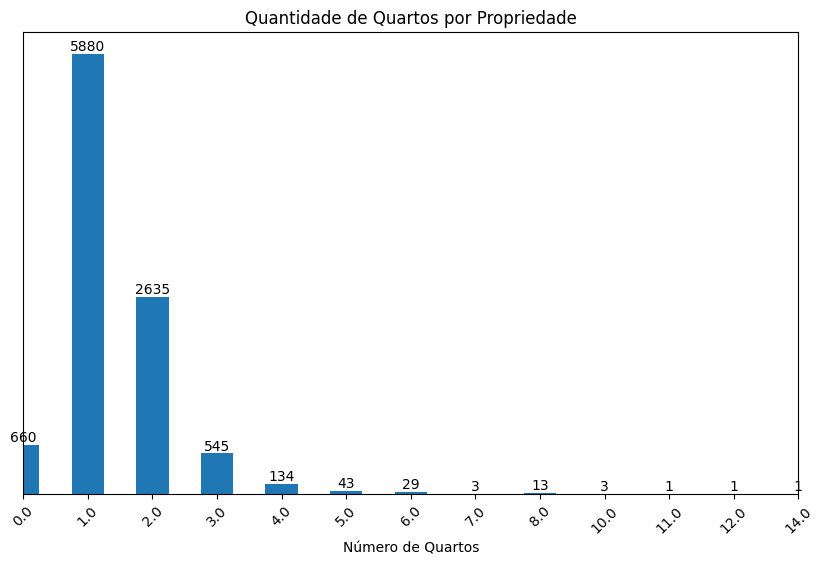

In [69]:

# Análise Exploratória de Dados
# Distribuição de preços
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribuição de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# Tipos de quartos mais comuns
plt.figure(figsize=(10, 6))
sns.countplot(data['room_type'])
plt.title('Tipos de Quartos Mais Comuns')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Contagem')
plt.show()

# Quantidade de quartos por propriedade
plt.figure(figsize=(10, 6))
ax = data['quantidade_quarto'].value_counts().sort_index().plot(kind='bar')
plt.title('Quantidade de Quartos por Propriedade')
plt.xlabel('Número de Quartos')
plt.ylabel('')  # Remover rótulo do eixo y
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xlim(0, 12)  # Definir o limite do eixo x até 12

# Adicionar os valores acima de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.yticks([])  # Remover a escala do eixo y
plt.show()


In [70]:
# média de preço do top 10 localidades mais caras
print(" Média de preço dos bairros:\n")
mediab= data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]
print(mediab)
print("=========================================================")
print()
# Bairros com melhores avaliações
print("Bairros com melhores avaliações:\n")
votados= data.groupby('neighbourhood')['rating'].mean().sort_values(ascending=False)[:10]
print(votados)
print("=========================================================")
print()
# contagem de imóveis por localidade
print("Quantidade de imóveis por bairro:\n")
quantidade=data['neighbourhood'].value_counts()
print(quantidade)

 Média de preço dos bairros:

neighbourhood
ΖΑΠΠΕΙΟ                   163.770370
ΚΟΛΩΝΑΚΙ                  123.238710
ΑΚΡΟΠΟΛΗ                  119.506369
ΡΗΓΙΛΛΗΣ                  118.000000
ΚΕΡΑΜΕΙΚΟΣ                106.594306
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ    106.396525
ΘΗΣΕΙΟ                    105.801242
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ       104.843116
ΛΥΚΑΒΗΤΤΟΣ                 90.432203
1Ο ΝΕΚΡΟΤΑΦΕΙΟ             88.000000
Name: price, dtype: float64

Bairros com melhores avaliações:

neighbourhood
ΠΕΝΤΑΓΩΝΟ              4.775000
1Ο ΝΕΚΡΟΤΑΦΕΙΟ         4.644242
ΓΚΑΖΙ                  4.591910
ΣΕΠΟΛΙΑ                4.518824
ΠΕΔΙΟ ΑΡΕΩΣ            4.469508
ΒΟΤΑΝΙΚΟΣ              4.468788
ΖΑΠΠΕΙΟ                4.443926
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ      4.416481
ΑΚΡΟΠΟΛΗ               4.398057
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ    4.341846
Name: rating, dtype: float64

Quantidade de imóveis por bairro:

neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1957
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  937
ΝΕΟΣ ΚΟΣΜΟΣ                 

In [61]:
# Verificando os valores de latitude / longitude..
print(data['latitude'].head())
print('=======================')
print(data['latitude'].tail())

0    3798863.0
1    3798903.0
2    3798888.0
3    3798903.0
4    3798924.0
Name: latitude, dtype: float64
13031    3.796684e+08
13044    3.796684e+08
13063    3.796448e+08
13071    3.797690e+08
13142    3.797037e+15
Name: latitude, dtype: float64


In [62]:
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Ajustar coordenadas dividindo por 10^5
data['latitude_adjusted'] = data['latitude'] / 100000
data['longitude_adjusted'] = data['longitude'] / 100000

# Filtrar coordenadas dentro do intervalo esperado
lat_filter = (data['latitude_adjusted'] >= 37) & (data['latitude_adjusted'] <= 38)
lon_filter = (data['longitude_adjusted'] >= 23) & (data['longitude_adjusted'] <= 24)
filtered_data = data[lat_filter & lon_filter]

# Se necessário, ajustar os dados restantes
filtered_data['latitude_final'] = filtered_data['latitude_adjusted']
filtered_data['longitude_final'] = filtered_data['longitude_adjusted']

# Verificar se ainda há coordenadas fora do intervalo
outliers = data[~lat_filter | ~lon_filter]

# Ajustar os outliers dividindo por 10^6 e filtrando novamente
outliers['latitude_adjusted'] = outliers['latitude'] / 1000000
outliers['longitude_adjusted'] = outliers['longitude'] / 1000000

lat_filter_outliers = (outliers['latitude_adjusted'] >= 37) & (outliers['latitude_adjusted'] <= 38)
lon_filter_outliers = (outliers['longitude_adjusted'] >= 23) & (outliers['longitude_adjusted'] <= 24)

outliers = outliers[lat_filter_outliers & lon_filter_outliers]
outliers['latitude_final'] = outliers['latitude_adjusted']
outliers['longitude_final'] = outliers['longitude_adjusted']

# Concatenar dados filtrados e ajustados
final_data = pd.concat([filtered_data, outliers])

# Selecionar colunas finais
coords = final_data[['latitude_final', 'longitude_final']]

# Determinar o número de clusters (ajustar conforme necessário)
num_clusters = 10

# Aplicar KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(coords)
final_data['cluster'] = kmeans.labels_

# Coordenadas de Atenas
athens_coords = [37.9838, 23.7275]

# Criar mapa base
map_athens = folium.Map(location=athens_coords, zoom_start=12)

# Criar clusters no mapa
marker_cluster = MarkerCluster().add_to(map_athens)

# Adicionar marcadores ao cluster
for idx, row in final_data.iterrows():
    folium.Marker(
        location=[row['latitude_final'], row['longitude_final']],
        popup=f"Cluster: {row['cluster']}\nPreço: {row['price']}\nAvaliações: {row['rating']}"
    ).add_to(marker_cluster)

# Exibir o mapa no Jupyter Notebook
display(map_athens)



Output hidden; open in https://colab.research.google.com to view.

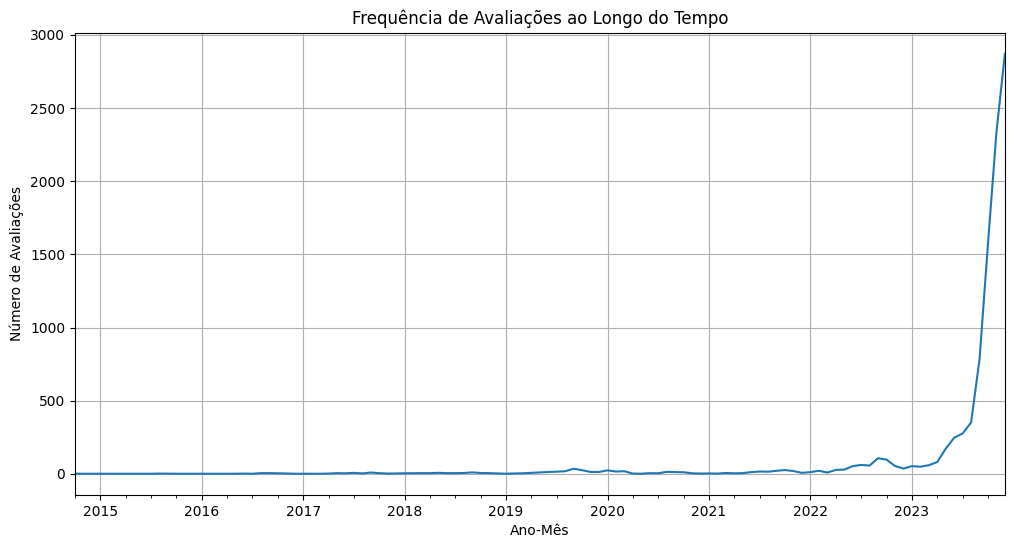

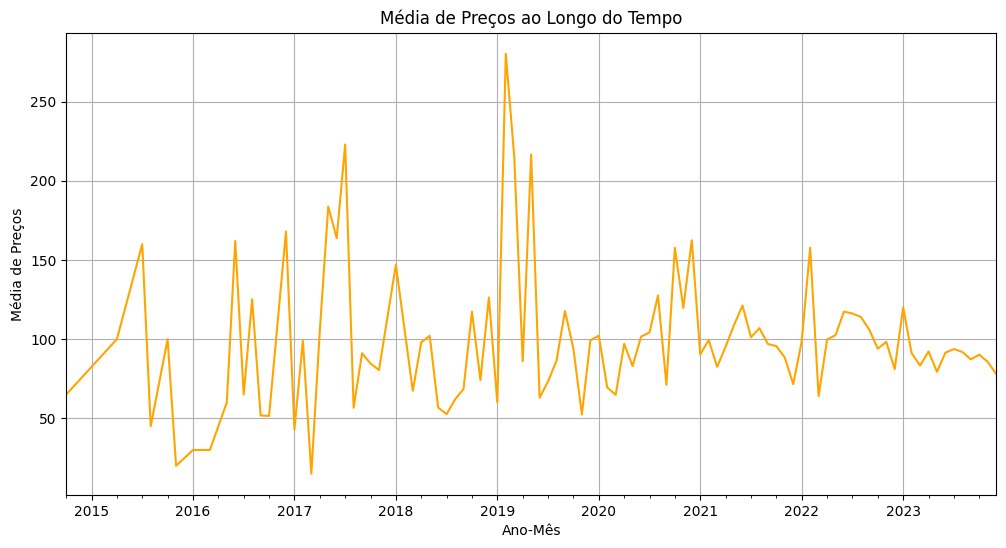

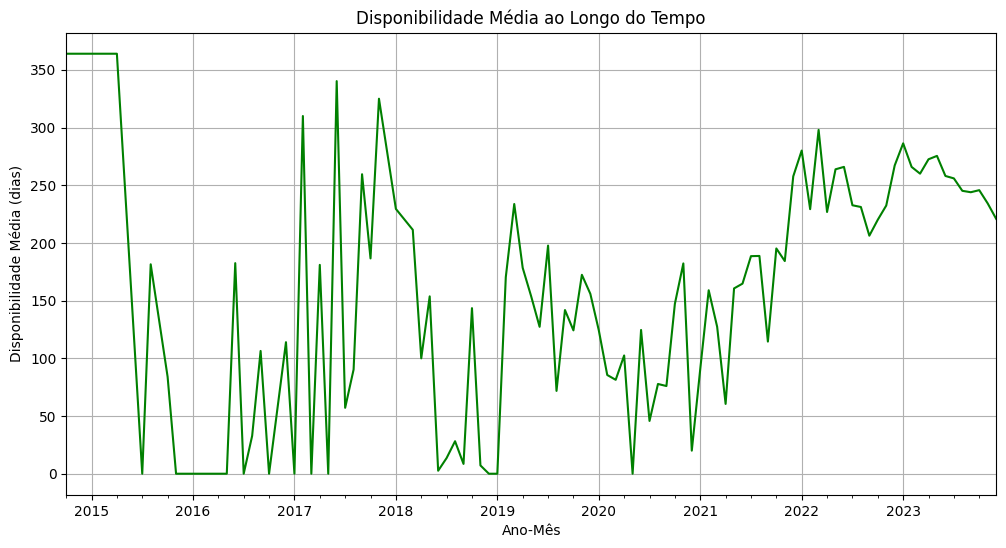

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Converter 'last_review' para datetime
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

# Criar uma nova coluna 'year_month' para agrupar por ano e mês
data['year_month'] = data['last_review'].dt.to_period('M')

# Remover entradas com 'last_review' nulo
data = data.dropna(subset=['last_review'])

# Analisar a frequência de avaliações ao longo do tempo
reviews_per_month = data['year_month'].value_counts().sort_index()

# Plotar a frequência de avaliações ao longo do tempo
plt.figure(figsize=(12, 6))
reviews_per_month.plot(kind='line')
plt.title('Frequência de Avaliações ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Avaliações')
plt.grid(True)
plt.show()

# Analisar a média de preços ao longo do tempo
mean_price_per_month = data.groupby('year_month')['price'].mean()

# Plotar a média de preços ao longo do tempo
plt.figure(figsize=(12, 6))
mean_price_per_month.plot(kind='line', color='orange')
plt.title('Média de Preços ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Média de Preços')
plt.grid(True)
plt.show()

# Analisar a disponibilidade média ao longo do tempo
mean_availability_per_month = data.groupby('year_month')['availability_365'].mean()

# Plotar a disponibilidade média ao longo do tempo
plt.figure(figsize=(12, 6))
mean_availability_per_month.plot(kind='line', color='green')
plt.title('Disponibilidade Média ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Disponibilidade Média (dias)')
plt.grid(True)
plt.show()


In [76]:
# Criar uma lista para armazenar os top 5 meses de cada ano
top_5_meses_por_ano = {}

# Iterar sobre os anos de 2015 até 2023
for ano in range(2015, 2024):
    # Filtrar os dados para o ano atual
    dados_ano_atual = data[data['year_month'].dt.year == ano]

    # Calcular a frequência de locações em cada mês
    locacoes_por_mes = dados_ano_atual['year_month'].value_counts().sort_values(ascending=False)

    # Selecionar os top 5 meses com maior frequência de locações
    top_5_meses_por_ano[ano] = locacoes_por_mes.head(5)

# Exibir os top 5 meses de cada ano
for ano, top_5_meses in top_5_meses_por_ano.items():
    print(f"Top 5 meses de {ano}:")
    print(top_5_meses)
    print()


Top 5 meses de 2015:
year_month
2015-08    2
2015-04    1
2015-07    1
2015-10    1
2015-11    1
Freq: M, Name: count, dtype: int64

Top 5 meses de 2016:
year_month
2016-08    5
2016-09    5
2016-10    4
2016-06    2
2016-05    1
Freq: M, Name: count, dtype: int64

Top 5 meses de 2017:
year_month
2017-09    9
2017-07    7
2017-10    5
2017-05    5
2017-06    4
Freq: M, Name: count, dtype: int64

Top 5 meses de 2018:
year_month
2018-09    10
2018-05     7
2018-08     6
2018-10     6
2018-04     5
Freq: M, Name: count, dtype: int64

Top 5 meses de 2019:
year_month
2019-09    35
2019-10    25
2019-08    18
2019-07    15
2019-06    13
Freq: M, Name: count, dtype: int64

Top 5 meses de 2020:
year_month
2020-01    24
2020-03    18
2020-02    16
2020-08    14
2020-09    12
Freq: M, Name: count, dtype: int64

Top 5 meses de 2021:
year_month
2021-10    26
2021-09    21
2021-11    19
2021-07    16
2021-08    15
Freq: M, Name: count, dtype: int64

Top 5 meses de 2022:
year_month
2022-09    107
20

## Conclusão

Os insights obtidos a partir da análise dos dados coletados da cidade de Atenas entre 2015 e 2023 revelam um aumento da demanda a partir de 2021.

Os dados indicam que:

A maior movimentação de locação ocorre a partir de agosto;

Houve um crescimento no número de hospedagens após o período de pandemia;

Os preços mantiveram certa estabilidade entre 2022 e 2023;

Os bairros com maior número de parceiros Airbnb são:

1.   ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ (Triângulo Comercial-Plaka): 1957
2.   ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ (Koukaki-Makrygianni): 937

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ (Triângulo Comercial-Plaka) e ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ (Koukaki-Makrygianni) são considerados turísticos em Atenas. Plaka é uma área histórica e turística bem conhecida por suas ruas pitorescas, lojas de souvenirs, restaurantes tradicionais e proximidade com a Acrópole. Koukaki-Makrygianni também é uma área turística popular, principalmente devido à sua proximidade com a Acrópole e aos muitos cafés, bares e tavernas ao redor;


Os bairros que concentram as melhores locações, segundo o sistema de avaliação, são:


1.   ΠΕΝΤΑΓΩΝΟ (Pentágono): 4.7
2.   1º ΝΕΚΡΟΤΑΦΕΙΟ (1º Cemitério): 4.6

Os bairros com hospedagens mais caras são:

1.   ΖΑΠΠΕΙΟ (Zappeio)
2.   ΚΟΛΩΝΑΚΙ (Kolonaki)

Sobre serem áreas turísticas:
O Zappeion é um grande salão de exposições e congressos no Jardim Nacional de Atenas, perto do centro da cidade. É uma área popular para turistas devido à sua proximidade com muitos dos principais pontos turísticos de Atenas, incluindo o Parlamento Grego, o Jardim Nacional e o Templo de Zeus. Kolonaki é uma das áreas mais sofisticadas e elegantes de Atenas. Kolonaki é conhecido por suas boutiques de luxo, cafés chiques, galerias de arte e vida noturna vibrante. Também é próximo a várias atrações culturais e históricas, como o Museu Benaki e o Monte Licabeto;

O tipo de locação predominante é casa/apartamento completo, geralmente possuindo 1 quarto;

Por fim, grande parte das hospedagens variam entre 10 e 150 euros. No entanto, existem hospedagens de luxo com valores superiores a 500 euros por diária.